In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ASSIGNEMET5/Copy of WhiteWineQuality.csv')

In [57]:
# Extract features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Number of cross-validation folds
num_folds = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
lr_mse_scores = []
lr_mae_scores = []
lr_r2_scores = []

rf_mse_scores = []
rf_mae_scores = []
rf_r2_scores = []

Fold 1:
Linear Regression:
MSE: 0.569024771727534
RMSE: 0.754337306334198
R^2: 0.265275004211965
MAE: 0.586266538327343

Random Forest Regression:
MSE: 0.346582551020408
RMSE: 0.588712621760743
R^2: 0.552492481890391
MAE: 0.418887755102041



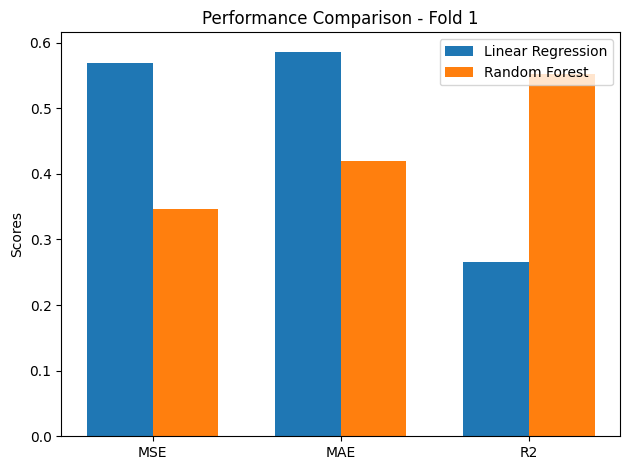

Fold 2:
Linear Regression:
MSE: 0.523258944275230
RMSE: 0.723366396976823
R^2: 0.283777989225511
MAE: 0.566556638578622

Random Forest Regression:
MSE: 0.324499693877551
RMSE: 0.569648746051065
R^2: 0.555834017196583
MAE: 0.405234693877551



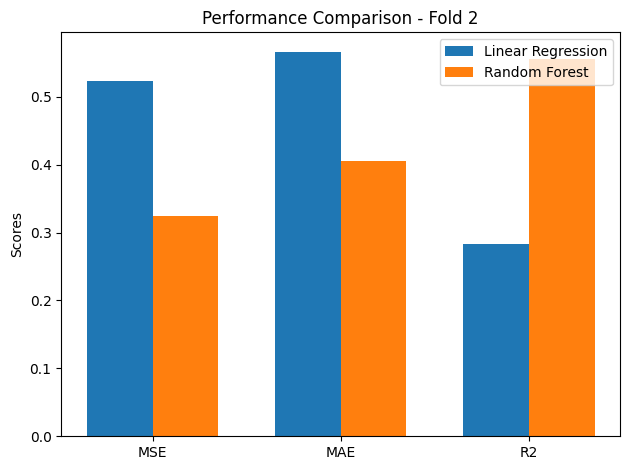

Fold 3:
Linear Regression:
MSE: 0.595784266060485
RMSE: 0.771870627800077
R^2: 0.261783063680265
MAE: 0.597611326388767

Random Forest Regression:
MSE: 0.377214489795918
RMSE: 0.614177897514978
R^2: 0.532605775520288
MAE: 0.432857142857143



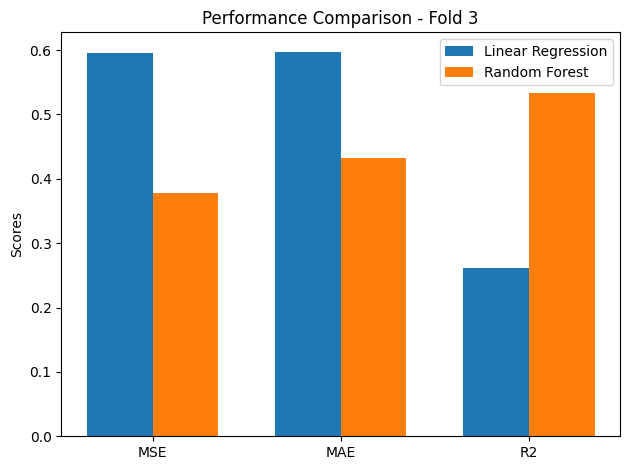

Fold 4:
Linear Regression:
MSE: 0.559403545837046
RMSE: 0.747932848481096
R^2: 0.305357955913884
MAE: 0.582856191608666

Random Forest Regression:
MSE: 0.369094892747702
RMSE: 0.607531803898118
R^2: 0.541674641378310
MAE: 0.436128702757916



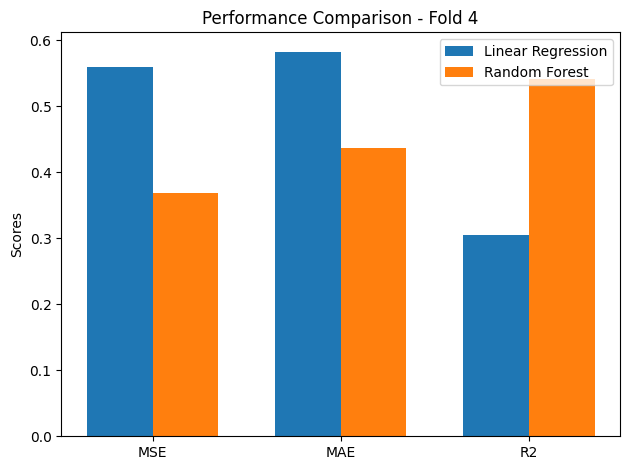

Fold 5:
Linear Regression:
MSE: 0.593255654710532
RMSE: 0.770230909994225
R^2: 0.258257463785079
MAE: 0.594977259782708

Random Forest Regression:
MSE: 0.414501634320735
RMSE: 0.643818013355277
R^2: 0.481752106254582
MAE: 0.456373850868233



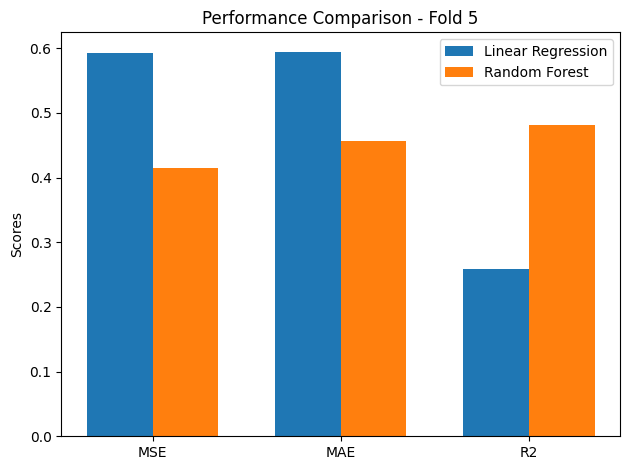

In [59]:
# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    lr_pred = lr.predict(X_test_scaled)

    lr_mse_scores.append(mean_squared_error(y_test, lr_pred))
    lr_mae_scores.append(mean_absolute_error(y_test, lr_pred))
    lr_r2_scores.append(r2_score(y_test, lr_pred))

    # Random Forest Regression
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_pred = rf.predict(X_test_scaled)

    rf_mse_scores.append(mean_squared_error(y_test, rf_pred))
    rf_mae_scores.append(mean_absolute_error(y_test, rf_pred))
    rf_r2_scores.append(r2_score(y_test, rf_pred))

    # Print metrics for each fold
    print(f"Fold {fold}:")
    print("Linear Regression:")
    print(f"MSE: {lr_mse_scores[-1]:.15f}")
    print(f"RMSE: {np.sqrt(lr_mse_scores[-1]):.15f}")
    print(f"R^2: {lr_r2_scores[-1]:.15f}")
    print(f"MAE: {lr_mae_scores[-1]:.15f}")
    print()

    print("Random Forest Regression:")
    print(f"MSE: {rf_mse_scores[-1]:.15f}")
    print(f"RMSE: {np.sqrt(rf_mse_scores[-1]):.15f}")
    print(f"R^2: {rf_r2_scores[-1]:.15f}")
    print(f"MAE: {rf_mae_scores[-1]:.15f}")
    print()

    # Visualization for each fold
    metrics = ['MSE', 'MAE', 'R2']
    lr_scores = [lr_mse_scores[-1], lr_mae_scores[-1], lr_r2_scores[-1]]
    rf_scores = [rf_mse_scores[-1], rf_mae_scores[-1], rf_r2_scores[-1]]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, lr_scores, width, label='Linear Regression')
    rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Comparison - Fold {fold}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    fig.tight_layout()
    plt.show()



Average Metrics across all Folds:
Linear Regression:
MSE: 0.568145436522165
RMSE: 0.753547617917284
R^2: 0.274890295363341
MAE: 0.585653590937221

Random Forest Regression:
MSE: 0.366378652352463
RMSE: 0.604777816516036
R^2: 0.532871804448031
MAE: 0.429896429092577



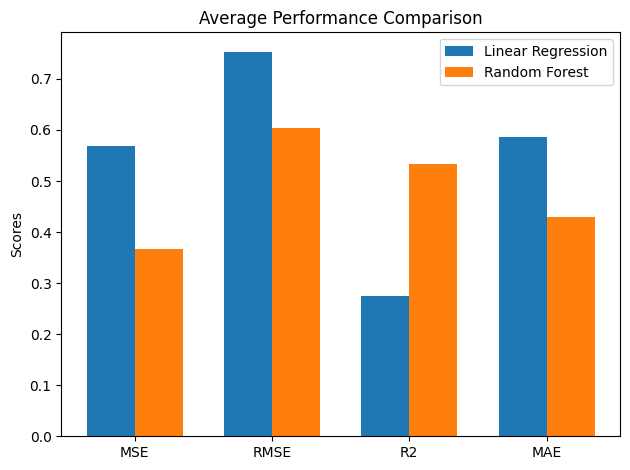

In [60]:
# Calculate average performance metrics across all folds
lr_avg_mse = np.mean(lr_mse_scores)
lr_avg_rmse = np.mean(np.sqrt(lr_mse_scores))
lr_avg_r2 = np.mean(lr_r2_scores)
lr_avg_mae = np.mean(lr_mae_scores)

rf_avg_mse = np.mean(rf_mse_scores)
rf_avg_rmse = np.mean(np.sqrt(rf_mse_scores))
rf_avg_r2 = np.mean(rf_r2_scores)
rf_avg_mae = np.mean(rf_mae_scores)

# Print average metrics
print("Average Metrics across all Folds:")
print("Linear Regression:")
print(f"MSE: {lr_avg_mse:.15f}")
print(f"RMSE: {lr_avg_rmse:.15f}")
print(f"R^2: {lr_avg_r2:.15f}")
print(f"MAE: {lr_avg_mae:.15f}")
print()

print("Random Forest Regression:")
print(f"MSE: {rf_avg_mse:.15f}")
print(f"RMSE: {rf_avg_rmse:.15f}")
print(f"R^2: {rf_avg_r2:.15f}")
print(f"MAE: {rf_avg_mae:.15f}")
print()

# Visualization
metrics = ['MSE', 'RMSE', 'R2', 'MAE']
lr_avg_scores = [lr_avg_mse, lr_avg_rmse, lr_avg_r2, lr_avg_mae]
rf_avg_scores = [rf_avg_mse, rf_avg_rmse, rf_avg_r2, rf_avg_mae]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_avg_scores, width, label='Linear Regression')
rects2 = ax.bar(x + width/2, rf_avg_scores, width, label='Random Forest')

ax.set_ylabel('Scores')
ax.set_title('Average Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()
